In [31]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter, defaultdict

In [32]:
# Sample data from the user's file (replace with actual data)
data = pd.read_csv('allphonelist.txt', sep='\t', header=None)
data.columns = ['id', 'transcriptions']

# Convert to DataFrame for processing
df = pd.DataFrame(data)

# Tokenization: split each transcription into words (tokens)
df['tokens'] = df['transcriptions'].str.split()

# Flatten the list of tokens to get a single list containing all tokens
all_tokens = [token for sublist in df['tokens'] for token in sublist]

# Convert all tokens list to a single string for vectorization
all_tokens_string = ' '.join(all_tokens)

# Define artificial languages
lang1 = ['t ux', 'p iy', 'r ow', 'g ow', 'l aa', 'b uw', 'b iy', 'd aa', 'k uw', 'p aa', 'd iy', 't aa']
lang2 = ['r aa', 'g eh', 'd ow', 'f iy', 'l ow', 'z aa', 'y uw', 'm aa', 'l eh', 'b ow', 'k aa', 'm iy']
lang3 = ['p ux', 'w aa', 'l ow', 't iy', 'z uw', 'y eh', 'b eh', 'm ow', 'r aa', 't ux', 'h iy', 'd ux']
perf_lang = ['r iy', 'l iy', 'dx ix', 'w ao', 'l ay', 'r ae', 'dh ax', 't ix', 'dh ix', 'm iy', 'sh iy', 's ix' ]

# Vectorize the corrected tokens for similarity calculation
vectorizer = CountVectorizer().fit([all_tokens_string])

# Create vectors for each "language"
lang1_vector = vectorizer.transform([' '.join(lang1)]).toarray()
lang2_vector = vectorizer.transform([' '.join(lang2)]).toarray()
lang3_vector = vectorizer.transform([' '.join(lang3)]).toarray()
perf_lang_vector = vectorizer.transform([' '.join(perf_lang)]).toarray()
all_tokens_vector = vectorizer.transform([all_tokens_string]).toarray()


In [33]:
# Calculate cosine similarity of each "language" to the entire corpus
similarity_lang1 = cosine_similarity(lang1_vector, all_tokens_vector)[0][0]
similarity_lang2 = cosine_similarity(lang2_vector, all_tokens_vector)[0][0]
similarity_lang3 = cosine_similarity(lang3_vector, all_tokens_vector)[0][0]
similarity_perf_lang = cosine_similarity(perf_lang_vector, all_tokens_vector)[0][0]

# Output the similarities
print(f'Similarity of lang1 to English: {similarity_lang1}')
print(f'Similarity of lang2 to English: {similarity_lang2}')
print(f'Similarity of lang3 to English: {similarity_lang3}')
print(f'Similarity of perf_lang to English: {similarity_perf_lang}')

Similarity of lang1 to English: 0.3483566980581238
Similarity of lang2 to English: 0.35226419383404095
Similarity of lang3 to English: 0.37526606306571275
Similarity of perf_lang to English: 0.663820660208335


In [34]:
import re
data.columns = ['id', 'transcriptions']

# Convert to DataFrame for processing
df = pd.DataFrame(data)

# Tokenization: split each transcription into words (tokens)
df['tokens'] = df['transcriptions'].str.split()
transcriptions = df['transcriptions']

# Defining vowels and consonants based on your input
vowels = ['iy', 'ih', 'eh', 'ey', 'ae', 'aa', 'aw', 'ay', 'ah', 'ao', 'oy', 'ow', 'uh', 'uw', 'ux', 'er', 'ax', 'ix', 'axr', 'ax-h']
consonants = ['b', 'd', 'g', 'p', 't', 'k', 'dx', 'q', 'jh', 'ch', 's', 'sh', 'z', 'zh', 'f', 'th', 'v', 'dh', 'm', 'n', 'ng', 'em', 'en', 'eng', 'nx', 'l', 'r', 'w', 'y', 'hh', 'hv', 'el']

# Function to extract CV pairs from a transcription
def extract_cv_pairs(transcription, vowels, consonants):
    cv_pairs = []
    elements = transcription.split()  # Split transcription into elements
    for i in range(1, len(elements)):  # Start from 1 to look for preceding consonants
        if elements[i] in vowels and elements[i-1] in consonants:
            cv_pairs.append((elements[i-1], elements[i]))
    return cv_pairs

# Count occurrences of CV pairs
cv_pair_counts = defaultdict(int)
for transcription in transcriptions:
    cv_pairs = extract_cv_pairs(transcription, vowels, consonants)
    for pair in cv_pairs:
        cv_pair_counts[pair] += 1

# Find the most common CV pairs
most_common_cv_pairs = sorted(cv_pair_counts.items(), key=lambda x: x[1], reverse=True)[:20]
print(most_common_cv_pairs)

[(('r', 'iy'), 1938), (('l', 'iy'), 1413), (('dx', 'ix'), 1096), (('w', 'ao'), 980), (('l', 'ay'), 926), (('r', 'ae'), 915), (('dh', 'ax'), 852), (('t', 'ix'), 837), (('dh', 'ix'), 804), (('m', 'iy'), 731), (('sh', 'iy'), 712), (('s', 'ix'), 703), (('d', 'aa'), 698), (('dh', 'ae'), 695), (('dx', 'axr'), 688), (('q', 'ao'), 678), (('d', 'ow'), 677), (('s', 'iy'), 672), (('s', 'ux'), 658), (('y', 'ux'), 613)]


In [35]:
# convert the most common CV pairs to a dataframe
df = pd.DataFrame(most_common_cv_pairs, columns=['CV Pair', 'Count'])

<Axes: title={'center': 'Most Common CV Pairs'}, xlabel='CV Pair'>

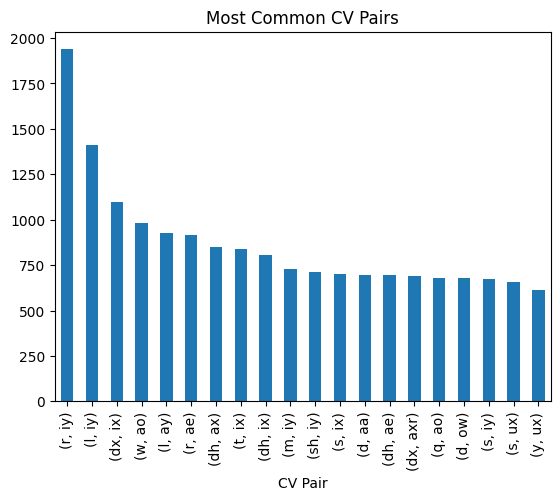

In [36]:
# Plot the most common CV pairs
df.plot(kind='bar', x='CV Pair', y='Count', legend=None, title='Most Common CV Pairs')

In [37]:
import pandas as pd
from collections import defaultdict, Counter

def extract_transitions_from_corpus(df):
    transitions = []
    for index, row in df.iterrows():
        words = str(row[1]).split()
        filtered_words = [word for word in words if not word.endswith('cl')]
        for i in range(len(filtered_words) - 1):
            transition = (filtered_words[i], filtered_words[i + 1])
            transitions.append(transition)
    return transitions

corpus_data = pd.read_csv('allphonelist.txt', sep='\t', header=None)
corpus_transitions = extract_transitions_from_corpus(corpus_data)
transition_counts = Counter(corpus_transitions)
most_common_transitions = transition_counts.most_common(36)

print("Most common syllable-to-syllable transitions in the corpus (excluding '-cl' syllables):")
for transition, count in most_common_transitions:
    print(f"Transition from '{transition[0]}' to '{transition[1]}': {count} occurrences")


Most common syllable-to-syllable transitions in the corpus (excluding '-cl' syllables):
Transition from 'ix' to 'n': 2813 occurrences
Transition from 'r' to 'iy': 1938 occurrences
Transition from 'aa' to 'r': 1437 occurrences
Transition from 'l' to 'iy': 1415 occurrences
Transition from 's' to 't': 1347 occurrences
Transition from 'ix' to 'k': 1276 occurrences
Transition from 'h#' to 'dh': 1104 occurrences
Transition from 'dx' to 'ix': 1096 occurrences
Transition from 'ao' to 'r': 1066 occurrences
Transition from 'ix' to 's': 1062 occurrences
Transition from 'ao' to 'l': 1046 occurrences
Transition from 'k' to 's': 1036 occurrences
Transition from 'ih' to 'n': 991 occurrences
Transition from 'w' to 'ao': 980 occurrences
Transition from 'g' to 'r': 941 occurrences
Transition from 'l' to 'ay': 926 occurrences
Transition from 'iy' to 's': 922 occurrences
Transition from 'r' to 'ae': 915 occurrences
Transition from 'ix' to 'z': 878 occurrences
Transition from 'ae' to 's': 875 occurrences
T

In [54]:
import pandas as pd
from collections import defaultdict, Counter

vowels = ['iy', 'ih', 'eh', 'ey', 'ae', 'aa', 'aw', 'ay', 'ah', 'ao', 'oy', 'ow', 'uh', 'uw', 'ux', 'er', 'ax', 'ix', 'axr', 'ax-h']
consonants = ['b', 'd', 'g', 'p', 't', 'k', 'dx', 'q', 'jh', 'ch', 's', 'sh', 'z', 'zh', 'f', 'th', 'v', 'dh', 'm', 'n', 'ng', 'em', 'en', 'eng', 'nx', 'l', 'r', 'w', 'y', 'hh', 'hv', 'el']

def extract_cv_transitions_from_corpus(df):
    transitions = []
    for index, row in df.iterrows():
        words = str(row[1]).split()
        for i in range(len(words) - 1):
            if words[i] in consonants and words[i + 1] in vowels:
                if i + 2 < len(words) and words[i + 2] in consonants and i + 3 < len(words) and words[i + 3] in vowels:
                    transition = ((words[i], words[i + 1]), (words[i + 2], words[i + 3]))
                    transitions.append(transition)
    return transitions

corpus_data = pd.read_csv('allphonelist.txt', sep='\t', header=None)
cv_transitions = extract_cv_transitions_from_corpus(corpus_data)
cv_transition_counts = Counter(cv_transitions)
most_common_cv_transitions = cv_transition_counts.most_common(50)
print("Most common CV to CV syllable transitions in the corpus:")
for transition, count in most_common_cv_transitions:
    print(f"Transition from '{transition[0][0]}{transition[0][1]}' to '{transition[1][0]}{transition[1][1]}': {count} occurrences")

df = pd.DataFrame(most_common_cv_transitions, columns=['CV Transition', 'Count'])
df['CV Transition'] = df['CV Transition'].apply(lambda x: f"{x[0][0]}{x[0][1]} - {x[1][0]}{x[1][1]}")
df

Most common CV to CV syllable transitions in the corpus:
Transition from 'liy' to 'rae': 476 occurrences
Transition from 'riy' to 'siy': 401 occurrences
Transition from 'keh' to 'riy': 379 occurrences
Transition from 'wao' to 'dxaxr': 360 occurrences
Transition from 'shiy' to 'hvae': 356 occurrences
Transition from 'dow' to 'nxae': 282 occurrences
Transition from 'miy' to 'dxix': 245 occurrences
Transition from 'dxaxr' to 'qao': 243 occurrences
Transition from 'qoy' to 'liy': 213 occurrences
Transition from 'siy' to 'waa': 209 occurrences
Transition from 'siy' to 'wao': 176 occurrences
Transition from 'shiy' to 'hveh': 160 occurrences
Transition from 'dow' to 'nae': 153 occurrences
Transition from 'noy' to 'liy': 138 occurrences
Transition from 'wao' to 'dxer': 132 occurrences
Transition from 'riy' to 'ziy': 113 occurrences
Transition from 'riy' to 'six': 104 occurrences
Transition from 'lix' to 'rae': 101 occurrences
Transition from 'mix' to 'dxix': 91 occurrences
Transition from 'dxe

,CV Transition,Count
0,liy - rae,476
1,riy - siy,401
2,keh - riy,379
3,wao - dxaxr,360
4,shiy - hvae,356
5,dow - nxae,282
6,miy - dxix,245
7,dxaxr - qao,243
8,qoy - liy,213
9,siy - waa,209


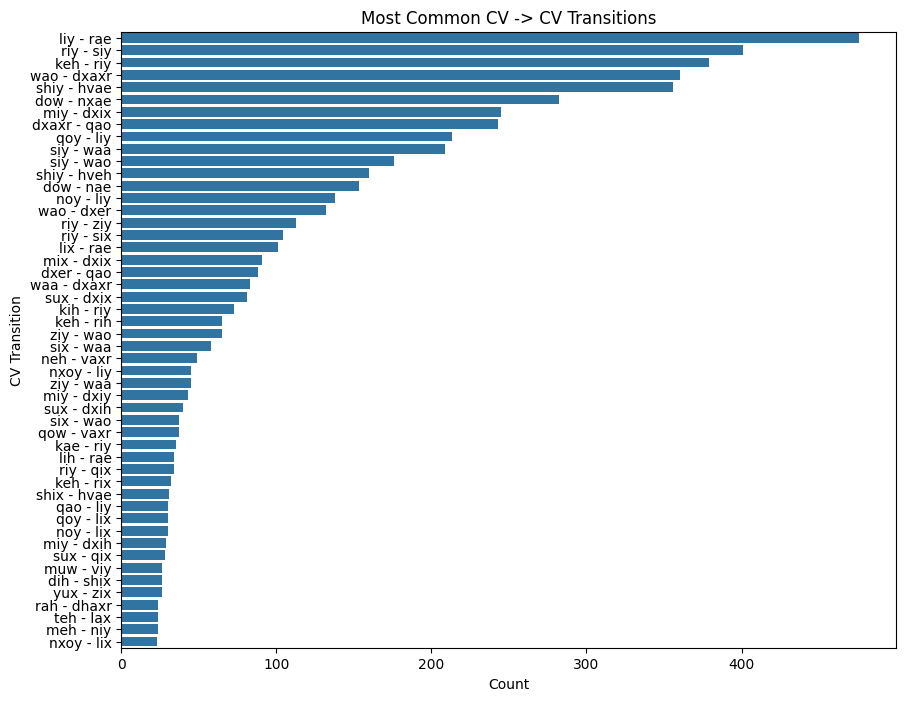

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the most common CV transitions
plt.figure(figsize=(10, 8))
sns.barplot(data=df, x='Count', y='CV Transition')  
plt.title('Most Common CV -> CV Transitions')
plt.show()


In [39]:
import pandas as pd
from collections import Counter

vowels = ['iy', 'ih', 'eh', 'ey', 'ae', 'aa', 'aw', 'ay', 'ah', 'ao', 'oy', 'ow', 'uh', 'uw', 'ux', 'er', 'ax', 'ix', 'axr', 'ax-h']
consonants = ['b', 'd', 'g', 'p', 't', 'k', 'dx', 'q', 'jh', 'ch', 's', 'sh', 'z', 'zh', 'f', 'th', 'v', 'dh', 'm', 'n', 'ng', 'em', 'en', 'eng', 'nx', 'l', 'r', 'w', 'y', 'hh', 'hv', 'el']

def extract_cv_triplets_from_corpus(df):
    triplets = []
    for index, row in df.iterrows():
        words = str(row[1]).split()
        for i in range(len(words) - 2):
            if all(word in consonants + vowels for word in words[i:i + 3]):
                if words[i] in consonants and words[i + 1] in vowels and words[i + 2] in consonants:
                    triplet = (words[i], words[i + 1], words[i + 2])
                    triplets.append(triplet)
    return triplets

corpus_data = pd.read_csv('allphonelist.txt', sep='\t', header=None)
cv_triplets = extract_cv_triplets_from_corpus(corpus_data)
triplet_counts = Counter(cv_triplets)
most_common_triplets = triplet_counts.most_common(20)

print("Most common CV-CV-CV triplets in the corpus:")
for triplet, count in most_common_triplets:
    print(f"Triplet '{'-'.join(triplet)}': {count} occurrences")


Most common CV-CV-CV triplets in the corpus:
Triplet 'd-aa-r': 612 occurrences
Triplet 'r-iy-s': 559 occurrences
Triplet 'sh-iy-hv': 520 occurrences
Triplet 'w-ao-dx': 512 occurrences
Triplet 'k-eh-r': 510 occurrences
Triplet 'l-iy-r': 495 occurrences
Triplet 'q-ao-l': 469 occurrences
Triplet 's-iy-w': 399 occurrences
Triplet 'd-ow-n': 356 occurrences
Triplet 'w-aa-sh': 333 occurrences
Triplet 'm-iy-dx': 328 occurrences
Triplet 'nx-ae-s': 288 occurrences
Triplet 'd-ow-nx': 286 occurrences
Triplet 'q-ix-n': 286 occurrences
Triplet 'q-oy-l': 274 occurrences
Triplet 'dx-axr-q': 269 occurrences
Triplet 'w-ao-sh': 263 occurrences
Triplet 'sh-ix-n': 240 occurrences
Triplet 'f-ao-r': 231 occurrences
Triplet 'k-ix-n': 196 occurrences
